In [1]:
##### Lets initialize some tensors in Python/Numpy
import numpy as np


In [2]:
# tensor with randomly generated entries, order 3, dims: 2-by-3-by-4
A = np.random.rand(2,3,4)
A

array([[[0.63550646, 0.02163087, 0.50245361, 0.09527731],
        [0.17040236, 0.82545068, 0.01897183, 0.68824429],
        [0.30850332, 0.97651299, 0.99908455, 0.763446  ]],

       [[0.95968202, 0.69655993, 0.11934551, 0.35170454],
        [0.94372133, 0.52855423, 0.99219533, 0.61463792],
        [0.43330993, 0.50255395, 0.04709869, 0.90255014]]])

In [3]:
# identity matrix, order 2, dims: 5-by-5 
B = np.eye(5,5)
B


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [4]:
# tensor of 1's, order 4, dims: 2-by-4-by-2-by-4
C = np.ones((2,4,2,4))
C


array([[[[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]]],


       [[[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]]]])

In [5]:
# matrix of 0's, order 2, dims: 3-by-5
D = np.zeros((3,5))
D


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [6]:
# initialize complex random tensor
E = np.random.rand(2,3,4) + 1j*np.random.rand(2,3,4)
E

array([[[0.54686318+0.01033021j, 0.0624211 +0.24219218j,
         0.68299464+0.90441214j, 0.75186962+0.69188548j],
        [0.13477039+0.79029821j, 0.59237187+0.26670832j,
         0.87909677+0.02371017j, 0.23877784+0.32772967j],
        [0.86225518+0.2081208j , 0.9731213 +0.91597874j,
         0.09794901+0.71340227j, 0.91827679+0.62362914j]],

       [[0.97896329+0.14353978j, 0.81943701+0.94341149j,
         0.31115802+0.65853201j, 0.33800529+0.01110505j],
        [0.45436901+0.42829517j, 0.40384721+0.74677395j,
         0.87743223+0.99240678j, 0.41763086+0.93845394j],
        [0.75226255+0.11533023j, 0.79678572+0.37552679j,
         0.22558284+0.0104994j , 0.40411723+0.95928833j]]])

In [7]:
A = np.random.rand(3,4)
B = np.random.rand(4,5)

C = A@B
C.shape

(3, 5)

In [13]:
##### Ex.1.2(a):Transpose
A = np.random.rand(4,4,4,4)
Atilda = A.transpose(3,0,1,2)
# print(A)
# print(Atilda)

In [14]:
##### Ex.1.2(b):Reshape
B = np.random.rand(4,4,4)
Btilda = B.reshape(4,4**2)

Binary tensor contractions

In [15]:
##### Ex.1.3(a): Binary Tensor Contraction
d = 10
A = np.random.rand(d,d,d,d)  
B = np.random.rand(d,d,d,d)

Ap  = A.transpose(0,2,1,3);  Bp = B.transpose(0,3,1,2)
App = Ap.reshape(d**2,d**2); Bpp = Bp.reshape(d**2,d**2)
Cpp = App @ Bpp;             C   = Cpp.reshape(d,d,d,d)

Contraction costs

In [16]:
##### Ex.1.4(c): Tensor network evaluation
d = 10
A = np.random.rand(d,d) 
B = np.random.rand(d,d)
C = np.random.rand(d,d)
# Evaluare network via summation over internal indices
F0 = np.zeros((d,d))
for di in range(d):
    for dj in range(d):
        for dk in range(d):
            for dl in range(d):
                F0[di,dj] = F0[di,dj] + A[di,dk]*B[dk,dl]*C[dl,dj]
            
# Evaluare network via sequence of binary contractions
F1 = (A @ B) @ C
F1.shape

(10, 10)

In [17]:
F0.shape

(10, 10)

# Contraction of tensor networks


Given a tensor network composed of N tensors, there are two distinct steps needed to contract the network efficiently:

1) determine the optimal sequence of the (N-1) binary tensor contractions,

2) evaluate each of the binary contractions in turn as a matrix multiplication by taking the proper tensor permutes and reshapes.

In [18]:
from ncon import ncon
d = 10
A = np.random.rand(d,d,d); B = np.random.rand(d,d,d,d)
C = np.random.rand(d,d,d); D = np.random.rand(d,d)

TensorArray = [A,B,C,D]
IndexArray = [[1,-2,2],[-1,1,3,4],[5,3,2],[4,5]]

E = ncon(TensorArray,IndexArray,order = [5,3,4,1,2])

let's try prev example

In [22]:
##### Ex.1.5(c): Partial trace
d = 10
A = np.random.rand(d,d,d,d,d,d)

B = ncon([A],[[-1,-2,1,-3,-4,1]])
B.shape

(10, 10, 10, 10)

In [23]:
##### Ex.1.5(d): Disjoint networks
d = 10
A = np.random.rand(d,d)
B = np.random.rand(d,d)

C = ncon([A,B],[[-1,-2],[-3,-4]])
C.shape

(10, 10, 10, 10)

# Hometask

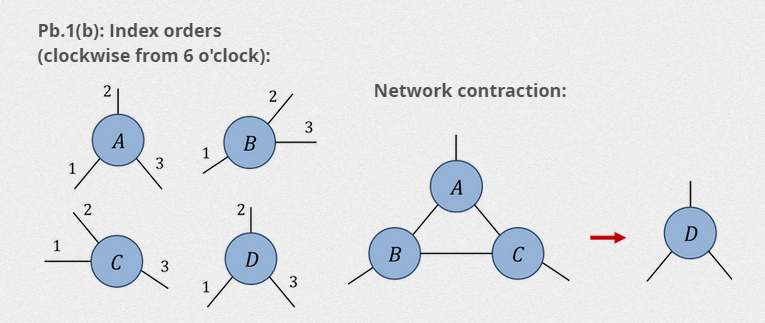

In [52]:
A = np.random.rand(3,2,4)
B = np.random.rand(1,5,4)
C = np.random.rand(3,5,6)


In [53]:
E = ncon([A,B,C],[[2,-1,1],[-2,3,1],[2,3,-3]])
print(E.shape)
E

(2, 1, 6)


array([[[ 9.64663009, 10.22315368,  8.45518912,  9.85293998,
          8.90469975, 10.51868074]],

       [[10.68383904, 11.73705314,  9.19366145, 11.13161834,
         11.04721897, 12.47172926]]])

In [54]:

Ap = A.reshape(3*2,4)
Bp = B.reshape(1*5,4)
Bpp = Bp.transpose()


In [55]:

AB = Ap@Bpp
AB.shape


(6, 5)

In [56]:

ABp = AB.reshape(3,2,1,5)
ABp.shape


(3, 2, 1, 5)

In [57]:

ABpp = ABp.transpose(1,2,0,3)
ABpp.shape


(2, 1, 3, 5)

In [58]:
ABppp = ABpp.reshape(1*2,3*5)
ABppp.shape

(2, 15)

In [59]:
Cp = C.reshape(5*3,6)
Cp.shape

(15, 6)

In [60]:
ABC = ABppp@Cp
ABC.shape


(2, 6)

In [61]:

ABCp = ABC.reshape(2,1,6)
ABCp.shape


(2, 1, 6)

In [62]:
ABCp

array([[[ 9.64663009, 10.22315368,  8.45518912,  9.85293998,
          8.90469975, 10.51868074]],

       [[10.68383904, 11.73705314,  9.19366145, 11.13161834,
         11.04721897, 12.47172926]]])

# Official solutions 

In [63]:
##### Pb.1(b) - Solutions
import numpy as np
from ncon import ncon

d = 20
A = np.random.rand(d,d,d) 
B = np.random.rand(d,d,d)
C = np.random.rand(d,d,d)


In [64]:

##### Evaluate network via index summation
def tempfunct(A,B,C,d):
    D0 = np.zeros((d,d,d))
    for b1 in range(d):
        for a2 in range(d):
            for c3 in range(d):
                for a1 in range(d):
                    for a3 in range(d):
                        for c1 in range(d):
                            D0[b1,a2,c3] = D0[b1,a2,c3]+A[a1,a2,a3]*B[b1,a1,c1]*C[c1,a3,c3]
    return D0

from timeit import default_timer as timer
t0 = timer(); D0 = tempfunct(A,B,C,d);
t_sum = timer() - t0


In [65]:
t_sum

39.496891100000084

In [66]:

##### Evaluate network using reshape and permute
def tempfunct2(A,B,C,d):
    Xmid = (B.transpose(0,2,1).reshape(d**2,d) @ A.reshape(d,d**2)).reshape(d,d,d,d)
    D1 = (Xmid.transpose(0,2,1,3).reshape(d**2,d**2) @ C.reshape(d**2,d)).reshape(d,d,d)
    return D1

t0 = timer(); D1 = tempfunct2(A,B,C,d);
t_res = timer() - t0


In [68]:

##### Evaluate using ncon
t0 = timer(); D2 = ncon([A,B,C],[[1,-2,2],[-1,1,3],[3,2,-3]],order = [1,2,3])
t_ncon = timer() - t0


In [69]:

##### Compare
tdiffs = [max(abs(D0-D1).flatten()),max(abs(D1-D2).flatten()),max(abs(D2-D0).flatten())]
ttimes = [t_sum, t_res, t_ncon]

In [70]:
ttimes

[39.496891100000084, 0.003255099999933009, 0.002249099999971804]